In [1]:
import pandas as pd
import pytz
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
# EXTRACTION
df_traj = pd.read_csv("trip_traj.csv")
df_od = pd.read_csv("trip_od.csv")
df_vo = pd.read_excel("JICA Tables.xlsx", sheet_name='Table 2.1.10')

print("TRIP OD")
display(df_od.head())
display(df_od.shape)
# display(df_traj.head())
# display(df_traj.shape)

# DATA CLEANING
column_rename = {'Unnamed: 0': 'index'}
df_traj = df_traj.rename(columns=column_rename)
df_od = df_od.rename(columns=column_rename)
df_od = df_od[['index', 'id', 'start_lat', 'start_lon', 'end_lat', 'end_lon', 'time', 'dt', 'distance', 'aver_speed']]

# Setting time
# df_od['time'] = pd.to_datetime(df_od['time'], unit='s')
# timezone = pytz.timezone('Etc/GMT+7')
# df_od['time'] = df_od['time'].dt.tz_localize(pytz.utc).dt.tz_convert(timezone)

print("TRIP OD")
display(df_od.head())
display(df_od.shape)

TRIP OD


Unnamed: 0                                    id  start_lat  start_lon  \
0       82630  NjdxOTRxNzE5azl0YTo5a2JiMW9lcXFrY2dk   11.54902  104.91924   
1       82631  OGppY242cWo4Zm90NjpmZ2JrcG81b2k0cTdq   11.55893  104.90146   
2       82632  NGxjNTZiNWhtMW8yazo5dm1ybmpyZXY5dmNx   11.57772  104.88223   
3       82633  NmoxOXFidTE2NDE3dTpkajBxMWlzMWVyYWE1   11.59833  104.88362   
4       82634  NzEzazAzOGQ0b2hzbzpjY2N2NXNmY3N2ZWV0   11.62541  104.92467   

    end_lat    end_lon                                               path  \
0  11.54807  104.93109  149.0,150.0,151.0,152.0,153.0,154.0,155.0,156....   
1  11.56971  104.89853  961.0,962.0,963.0,964.0,965.0,966.0,967.0,968....   
2  11.57468  104.88775  1678.0,1679.0,1680.0,1681.0,1682.0,1683.0,1684...   
3  11.60824  104.89405                                      1028.0,1029.0   
4  11.63609  104.92019                      297.0,298.0,299.0,300.0,301.0   

         time   dt     distance  aver_speed  
0  1689094803  676  2835.936342    4.195172  
1  1689094812  223  2752.782123   12.344314  
2  1689094818  227  1366.980997    6.021943  
3  1689094842  610  1583.232169    2.595463  
4  1689094879  429  1324.683042    3.087839

(44102, 11)

TRIP OD


index                                    id  start_lat  start_lon  \
0  82630  NjdxOTRxNzE5azl0YTo5a2JiMW9lcXFrY2dk   11.54902  104.91924   
1  82631  OGppY242cWo4Zm90NjpmZ2JrcG81b2k0cTdq   11.55893  104.90146   
2  82632  NGxjNTZiNWhtMW8yazo5dm1ybmpyZXY5dmNx   11.57772  104.88223   
3  82633  NmoxOXFidTE2NDE3dTpkajBxMWlzMWVyYWE1   11.59833  104.88362   
4  82634  NzEzazAzOGQ0b2hzbzpjY2N2NXNmY3N2ZWV0   11.62541  104.92467   

    end_lat    end_lon        time   dt     distance  aver_speed  
0  11.54807  104.93109  1689094803  676  2835.936342    4.195172  
1  11.56971  104.89853  1689094812  223  2752.782123   12.344314  
2  11.57468  104.88775  1689094818  227  1366.980997    6.021943  
3  11.60824  104.89405  1689094842  610  1583.232169    2.595463  
4  11.63609  104.92019  1689094879  429  1324.683042    3.087839

(44102, 10)

# Considering Starting Coordinates, Ending Coordinates, and Time Together

## Scotts Factor

In [15]:
# 5D KDE PLOT
from scipy.stats import gaussian_kde
np.random.seed(42)  

start_lat = df_od['start_lat']
start_lon = df_od['start_lon']
end_lat = df_od['end_lat']
end_lon = df_od['end_lon']
time = df_od['time']
coords = np.vstack([start_lat, start_lon, end_lat, end_lon, time])

# Creating the 5D KDE model
kde_5d = gaussian_kde(coords, bw_method='scott')

# Generating the samples
num_samples = 2 * 10**6
samples = kde_5d.resample(size=num_samples)

df_coordinates = pd.DataFrame(samples.T, columns=['start_lat', 'start_lon', 'end_lat', 'end_lon', 'time'])

display(df_coordinates.head())
display(df_coordinates.shape)


c:\Users\natha\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_kde.py:474: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  norm = transpose(random_state.multivariate_normal(


start_lat   start_lon    end_lat     end_lon          time
0  11.539989  104.919504  11.538095  104.927719  1.689146e+09
1  11.617390  104.916753  11.605511  104.923598  1.689130e+09
2  11.575636  104.900026  11.568311  104.889803  1.689124e+09
3  11.551450  104.868108  11.558227  104.838854  1.689149e+09
4  11.584763  104.912892  11.589200  104.923651  1.689138e+09

(2000000, 5)

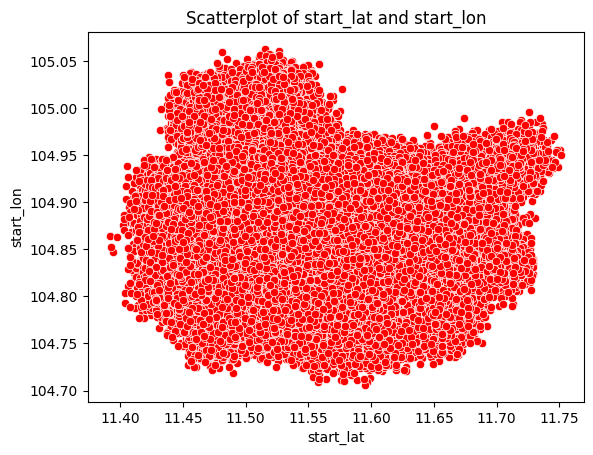

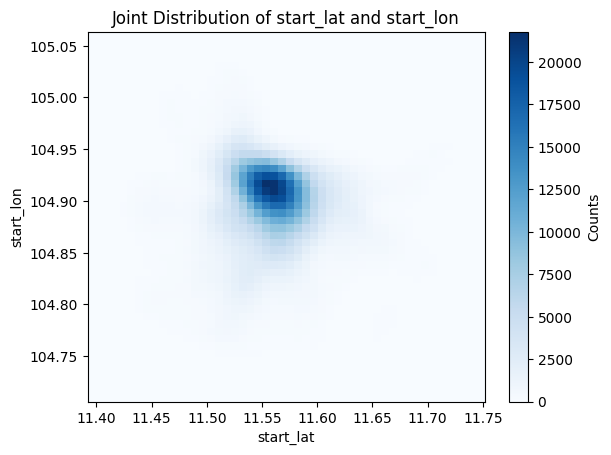

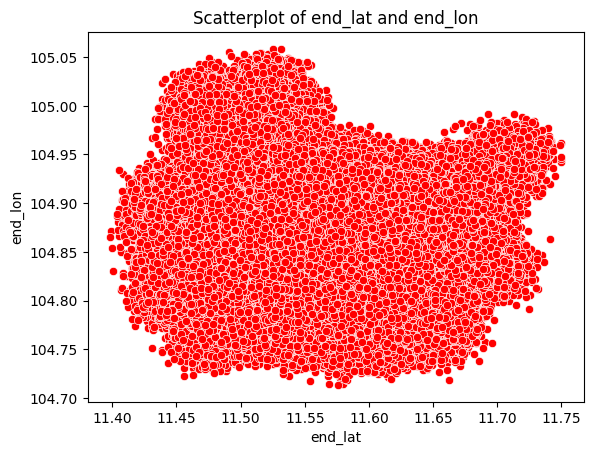

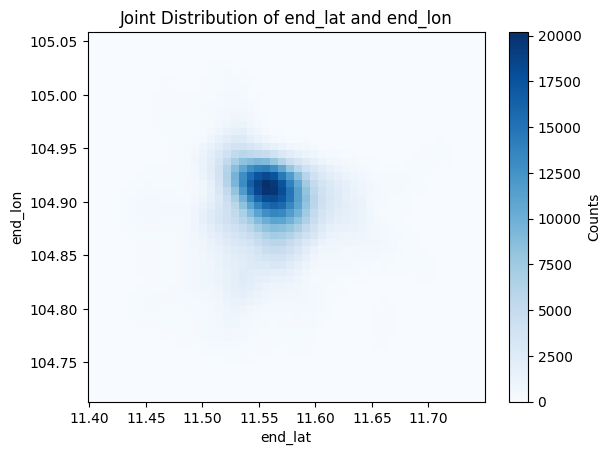

In [4]:
# DISPLAY: VISUALIZATION FOR GENERATED COORDINATES

# STARTING COORDINATES
sns.scatterplot(data=df_coordinates, x='start_lat', y='start_lon', color='red')
plt.xlabel('start_lat')
plt.ylabel('start_lon')
plt.title('Scatterplot of start_lat and start_lon')
plt.show()

plt.hist2d(df_coordinates['start_lat'], df_coordinates['start_lon'], bins=(50, 50), cmap=plt.cm.Blues)
plt.colorbar(label='Counts')
plt.xlabel('start_lat')
plt.ylabel('start_lon')
plt.title('Joint Distribution of start_lat and start_lon')
plt.show()

# ENDING COORDINATES
sns.scatterplot(data=df_coordinates, x='end_lat', y='end_lon', color='red')
plt.xlabel('end_lat')
plt.ylabel('end_lon')
plt.title('Scatterplot of end_lat and end_lon')
plt.show()

plt.hist2d(df_coordinates['end_lat'], df_coordinates['end_lon'], bins=(50, 50), cmap=plt.cm.Blues)
plt.colorbar(label='Counts')
plt.xlabel('end_lat')
plt.ylabel('end_lon')
plt.title('Joint Distribution of end_lat and end_lon')
plt.show()


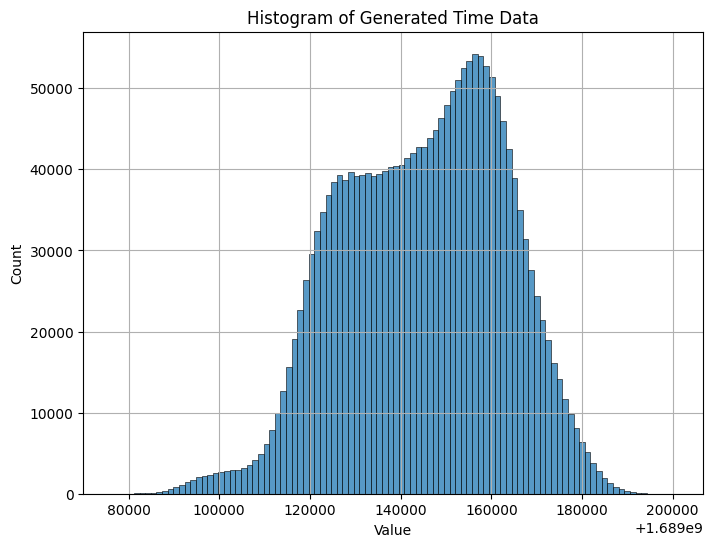

In [8]:
# DISPLAY: VISUALIZATION FOR TIME

plt.figure(figsize=(8, 6))
sns.histplot(x='time', data=df_coordinates, bins=100) 
plt.title('Histogram of Generated Time Data')
plt.xlabel('Value')
plt.ylabel('Count')
plt.grid(True)
plt.show()


### Checking the Distance

In [5]:
# DISTANCE
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    # Calculate the distance
    R = 6371.0    
    distance = R * c
    return 1000 * distance

df_coordinates['distance'] = float(0)

for i in range(len(df_coordinates)):
    start_lat, start_lon = df_coordinates.at[i, 'start_lat'], df_coordinates.at[i, 'start_lon']
    end_lat, end_lon = df_coordinates.at[i, 'end_lat'], df_coordinates.at[i, 'end_lon'] 
        
    df_coordinates.at[i,'distance'] = haversine(start_lat, start_lon, end_lat, end_lon)

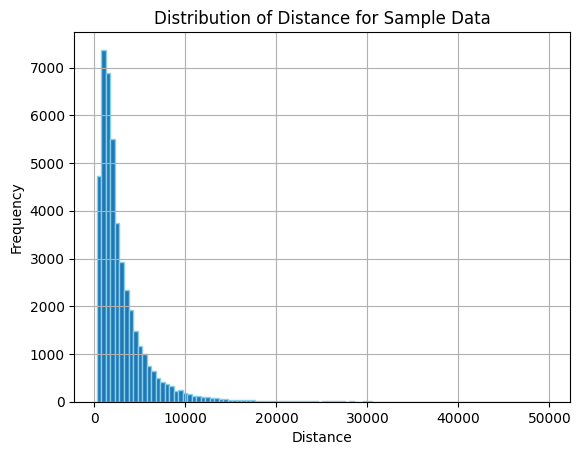

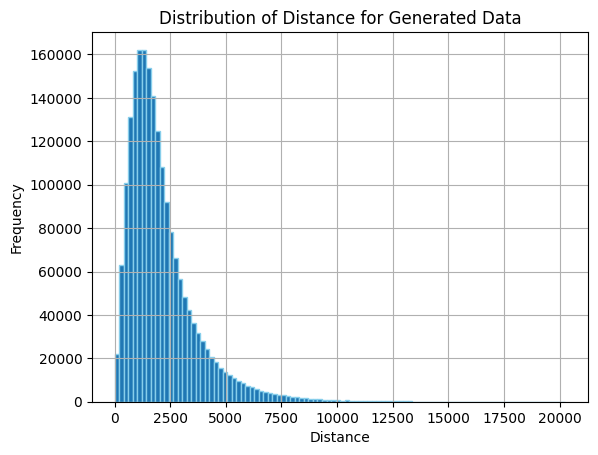

In [6]:
# DISPLAY: Distance of samples vs Distance of Generated Data

# SAMPLES
# plt.figure(figsize=(8, 6))
distance_samples = df_od['distance']
plt.hist(distance_samples, bins=100, edgecolor='skyblue')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Distance for Sample Data')
plt.grid(True)
plt.show()

# GENERATED DATA
# plt.figure(figsize=(8, 6))
distance_generated = df_coordinates['distance']
plt.hist(distance_generated, bins=100, edgecolor='skyblue')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Distance for Generated Data')
plt.grid(True)
plt.show()

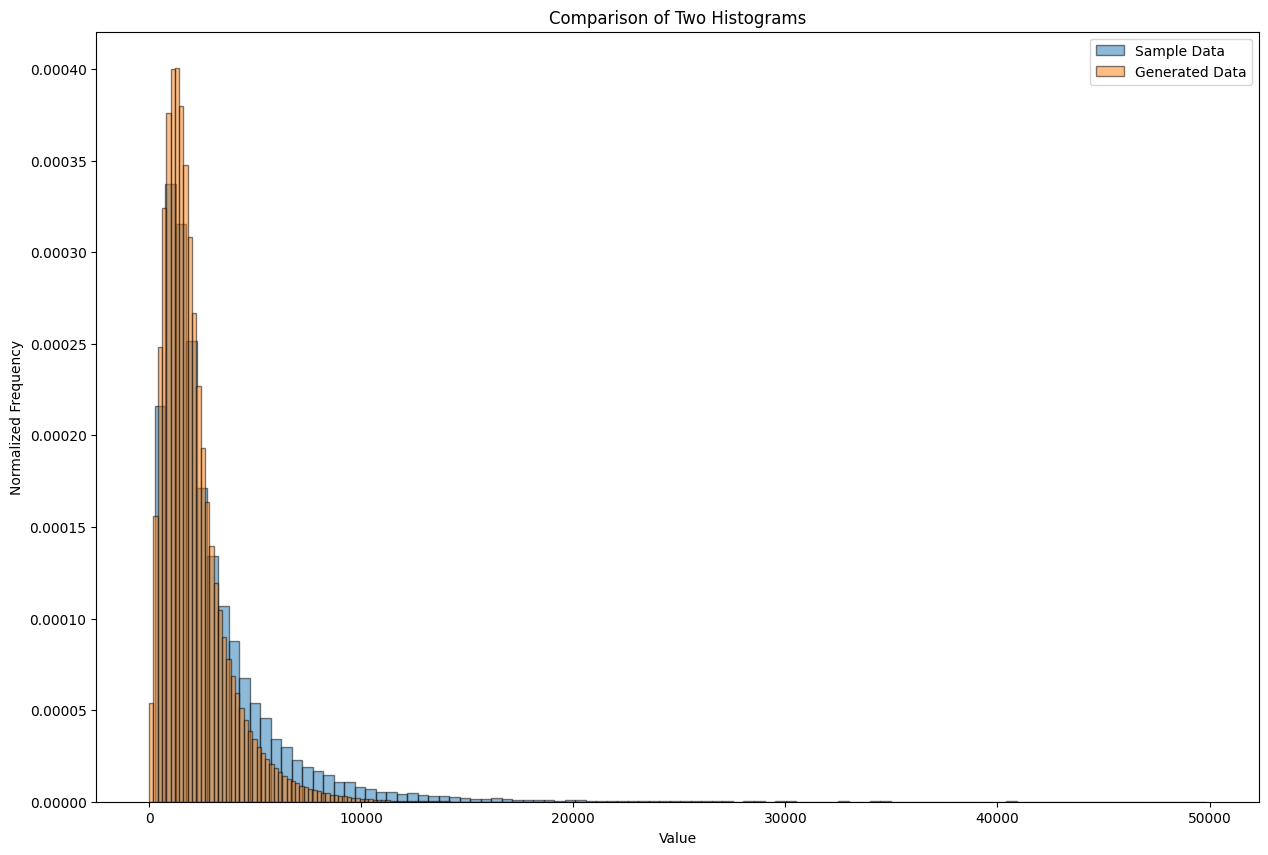

In [7]:
# COMPARISON

data1 = distance_samples.tolist()
data2 = distance_generated.tolist()

# Calculate histograms with normalized frequencies
hist_data1, bin_edges1 = np.histogram(data1, bins=100, density=True)
hist_data2, bin_edges2 = np.histogram(data2, bins=100, density=True)

# Plot histograms
plt.figure(figsize=(15, 10))
plt.hist(bin_edges1[:-1], bin_edges1, weights=hist_data1, alpha=0.5, label='Sample Data', edgecolor='black')
plt.hist(bin_edges2[:-1], bin_edges2, weights=hist_data2, alpha=0.5, label='Generated Data', edgecolor='black')

plt.xlabel('Value')
plt.ylabel('Normalized Frequency')
plt.title('Comparison of Two Histograms')
plt.legend()
plt.show()

## Silverman Factor

In [9]:
# 5D KDE PLOT
from scipy.stats import gaussian_kde
np.random.seed(42)  

start_lat = df_od['start_lat']
start_lon = df_od['start_lon']
end_lat = df_od['end_lat']
end_lon = df_od['end_lon']
time = df_od['time']
coords = np.vstack([start_lat, start_lon, end_lat, end_lon, time])

# Creating the 5D KDE model
kde_5d = gaussian_kde(coords, bw_method='silverman')

# Generating the samples
num_samples = 2 * 10**6
samples = kde_5d.resample(size=num_samples)

df_coordinates = pd.DataFrame(samples.T, columns=['start_lat', 'start_lon', 'end_lat', 'end_lon', 'time'])

display(df_coordinates.head())
display(df_coordinates.shape)


c:\Users\natha\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_kde.py:474: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  norm = transpose(random_state.multivariate_normal(


start_lat   start_lon    end_lat     end_lon          time
0  11.540190  104.919832  11.538650  104.927738  1.689147e+09
1  11.618154  104.915807  11.606064  104.922657  1.689130e+09
2  11.575730  104.899958  11.568400  104.890508  1.689124e+09
3  11.551455  104.868544  11.558364  104.839777  1.689149e+09
4  11.584867  104.912878  11.589124  104.924039  1.689139e+09

(2000000, 5)

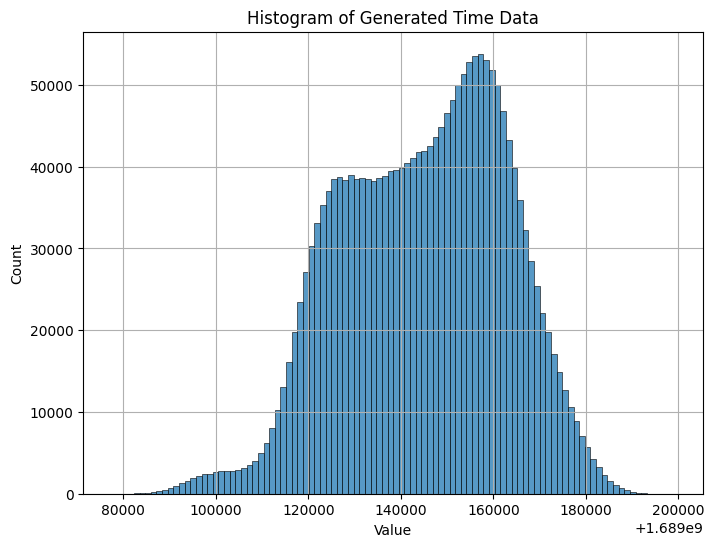

In [10]:
# DISPLAY: VISUALIZATION FOR TIME

plt.figure(figsize=(8, 6))
sns.histplot(x='time', data=df_coordinates, bins=100) 
plt.title('Histogram of Generated Time Data')
plt.xlabel('Value')
plt.ylabel('Count')
plt.grid(True)
plt.show()


### Checking the Distance

In [11]:
# DISTANCE
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    # Calculate the distance
    R = 6371.0    
    distance = R * c
    return 1000 * distance

df_coordinates['distance'] = float(0)

for i in range(len(df_coordinates)):
    start_lat, start_lon = df_coordinates.at[i, 'start_lat'], df_coordinates.at[i, 'start_lon']
    end_lat, end_lon = df_coordinates.at[i, 'end_lat'], df_coordinates.at[i, 'end_lon'] 
        
    df_coordinates.at[i,'distance'] = haversine(start_lat, start_lon, end_lat, end_lon)

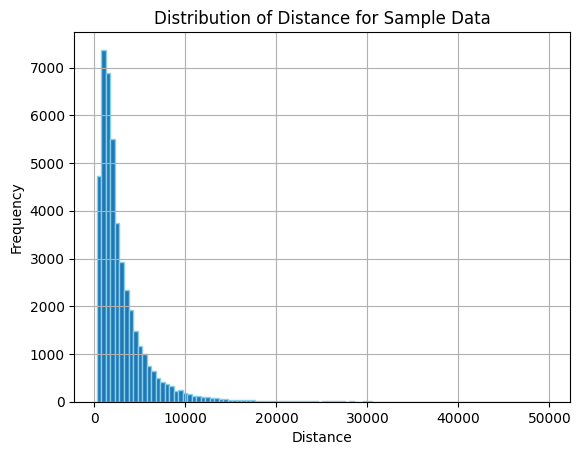

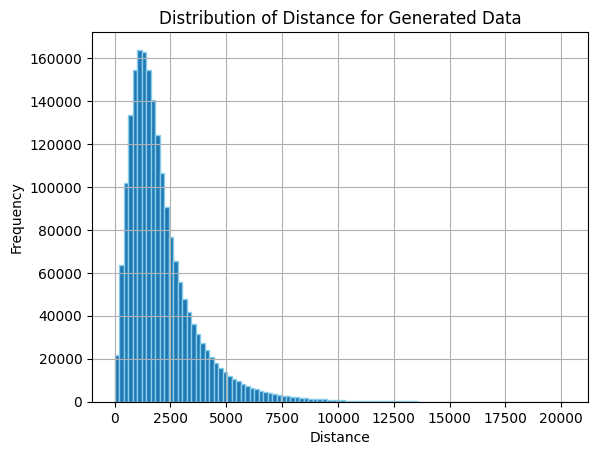

In [12]:
# DISPLAY: Distance of samples vs Distance of Generated Data

# SAMPLES
# plt.figure(figsize=(8, 6))
distance_samples = df_od['distance']
plt.hist(distance_samples, bins=100, edgecolor='skyblue')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Distance for Sample Data')
plt.grid(True)
plt.show()

# GENERATED DATA
# plt.figure(figsize=(8, 6))
distance_generated = df_coordinates['distance']
plt.hist(distance_generated, bins=100, edgecolor='skyblue')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Distance for Generated Data')
plt.grid(True)
plt.show()

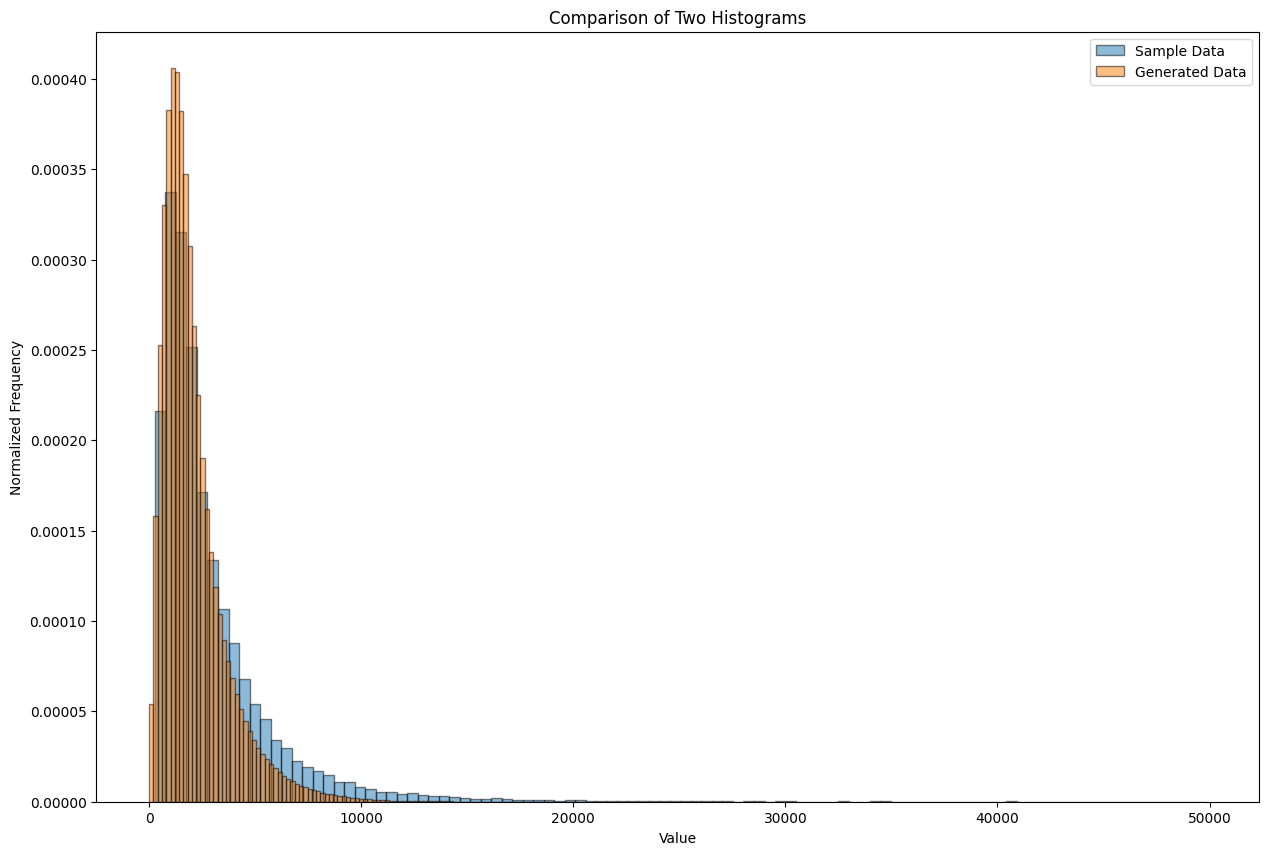

In [13]:
# COMPARISON

data1 = distance_samples.tolist()
data2 = distance_generated.tolist()

# Calculate histograms with normalized frequencies
hist_data1, bin_edges1 = np.histogram(data1, bins=100, density=True)
hist_data2, bin_edges2 = np.histogram(data2, bins=100, density=True)

# Plot histograms
plt.figure(figsize=(15, 10))
plt.hist(bin_edges1[:-1], bin_edges1, weights=hist_data1, alpha=0.5, label='Sample Data', edgecolor='black')
plt.hist(bin_edges2[:-1], bin_edges2, weights=hist_data2, alpha=0.5, label='Generated Data', edgecolor='black')

plt.xlabel('Value')
plt.ylabel('Normalized Frequency')
plt.title('Comparison of Two Histograms')
plt.legend()
plt.show()

# Understanding the Multivariate Relationship

c:\Users\natha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


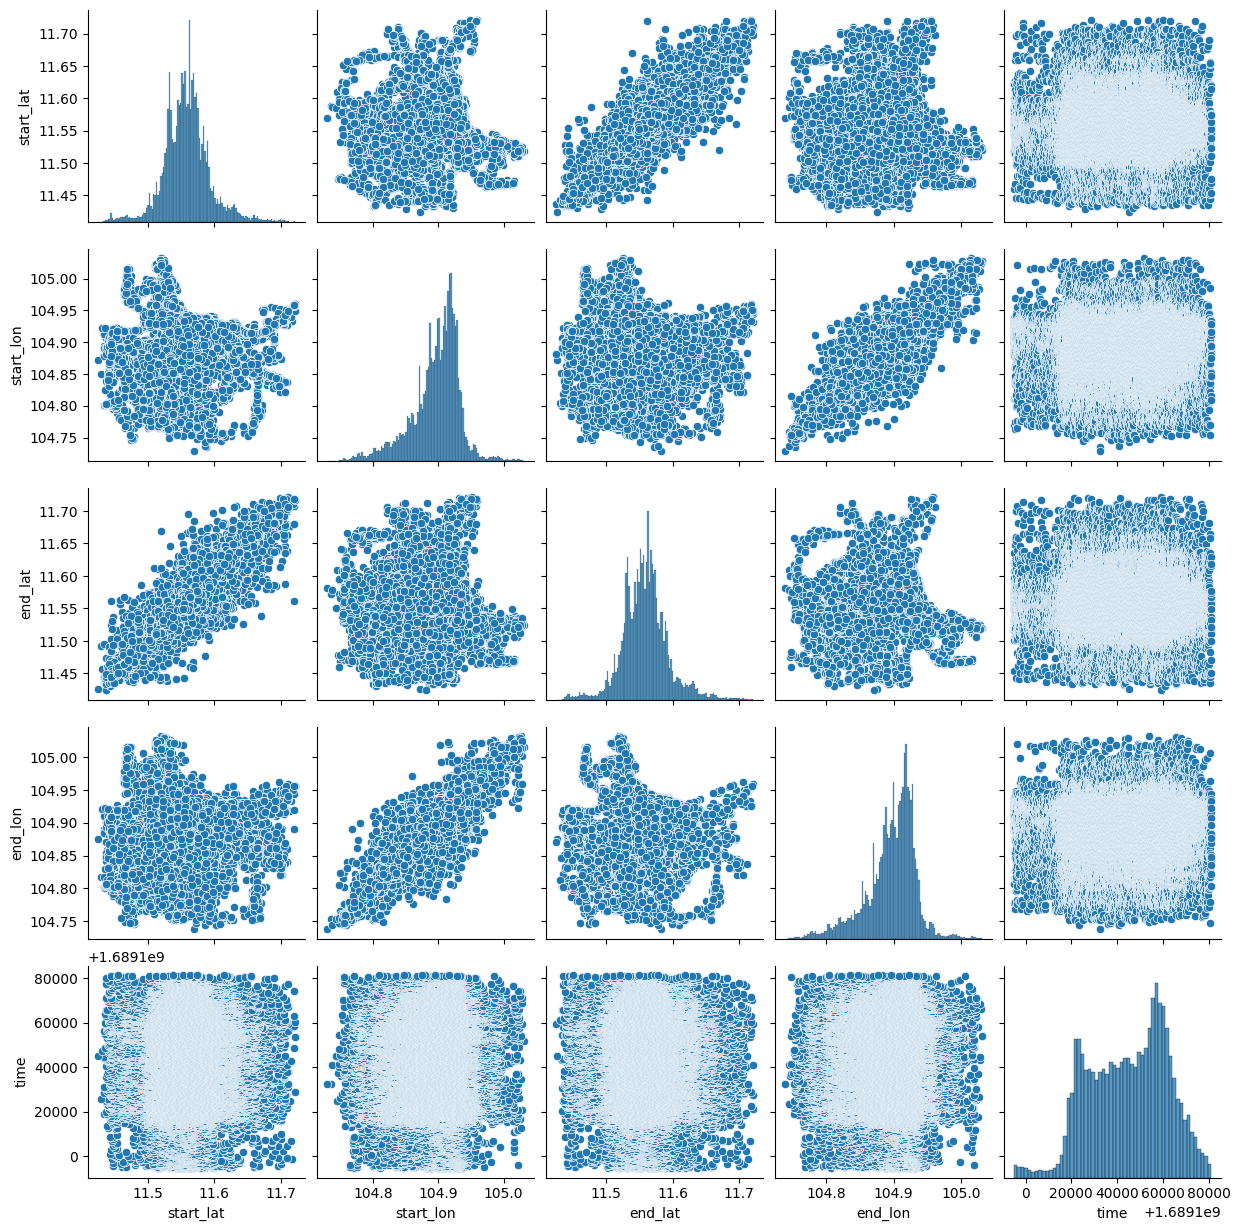

In [3]:
df_pp = df_od[['start_lat', 'start_lon', 'end_lat', 'end_lon', 'time']]

myplot = sns.pairplot(data=df_pp)
plt.show()

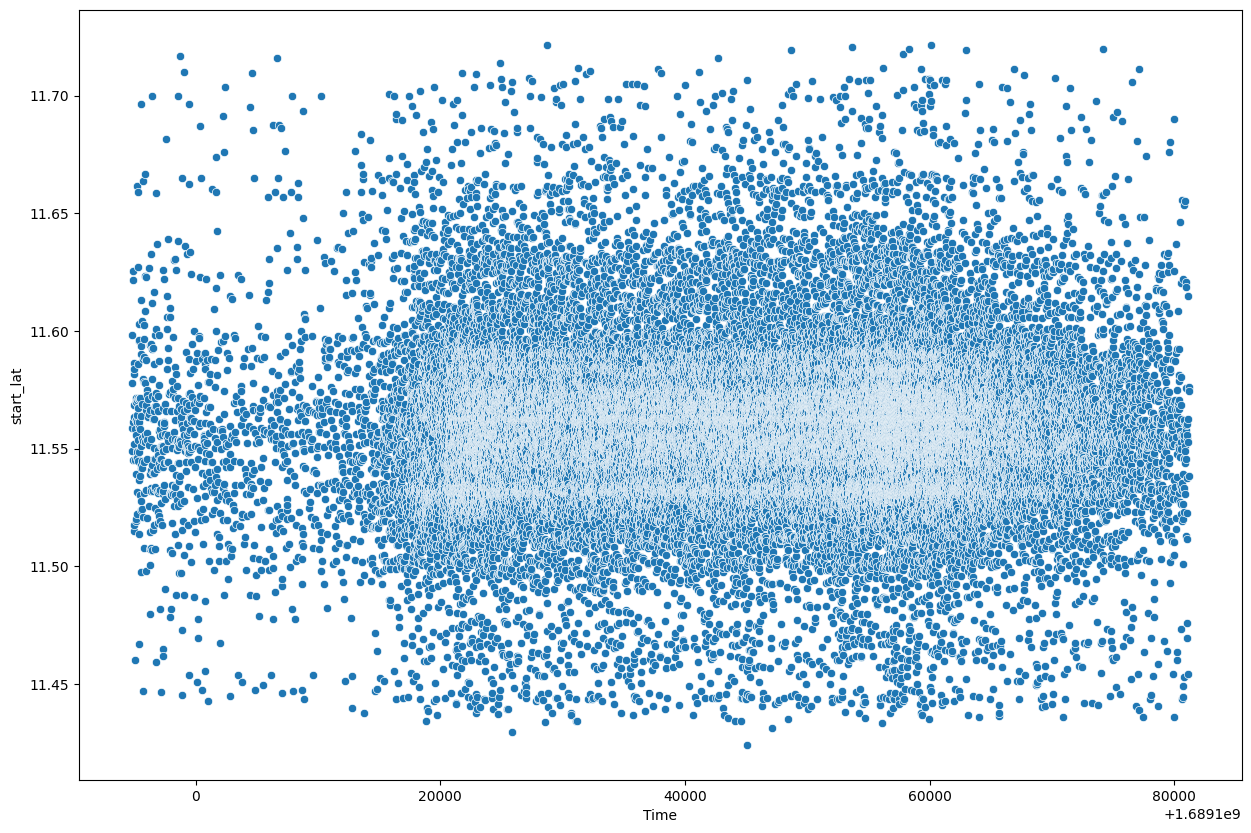

<Figure size 640x480 with 0 Axes>

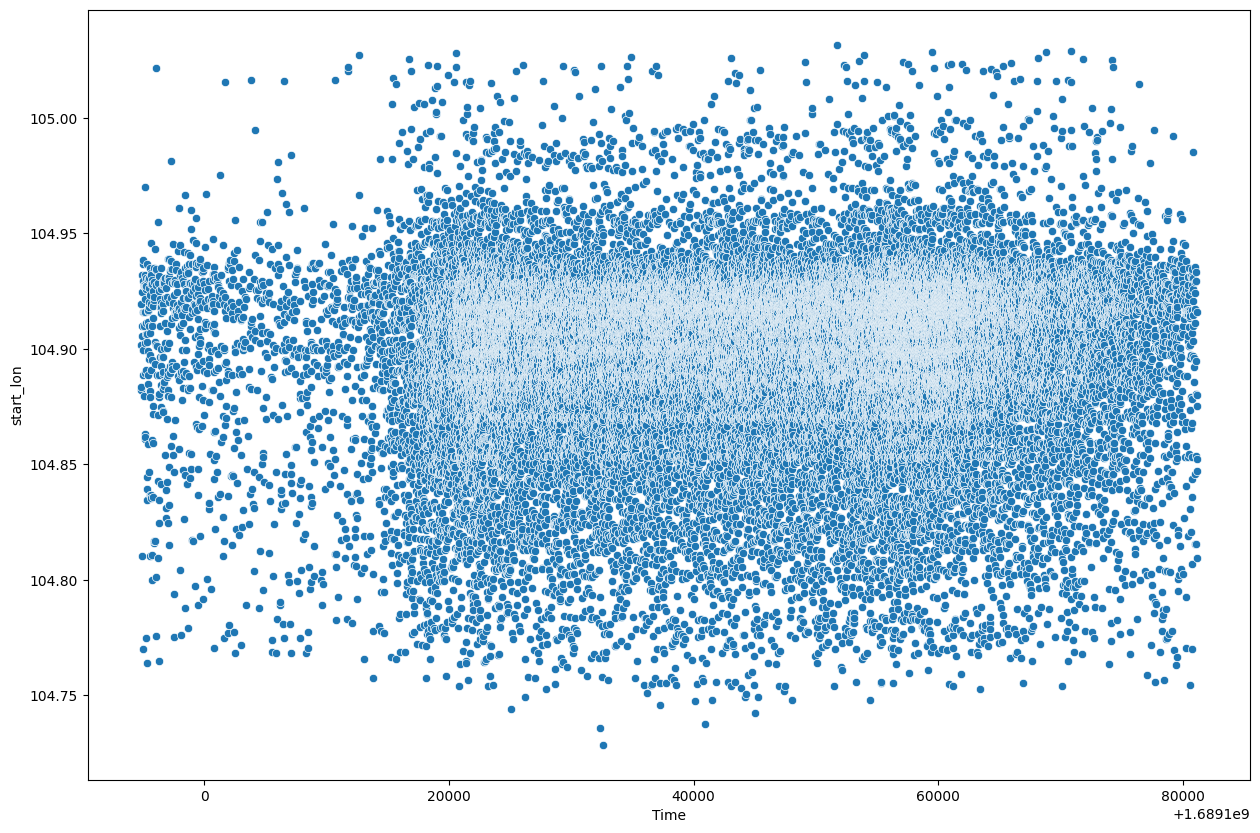

<Figure size 640x480 with 0 Axes>

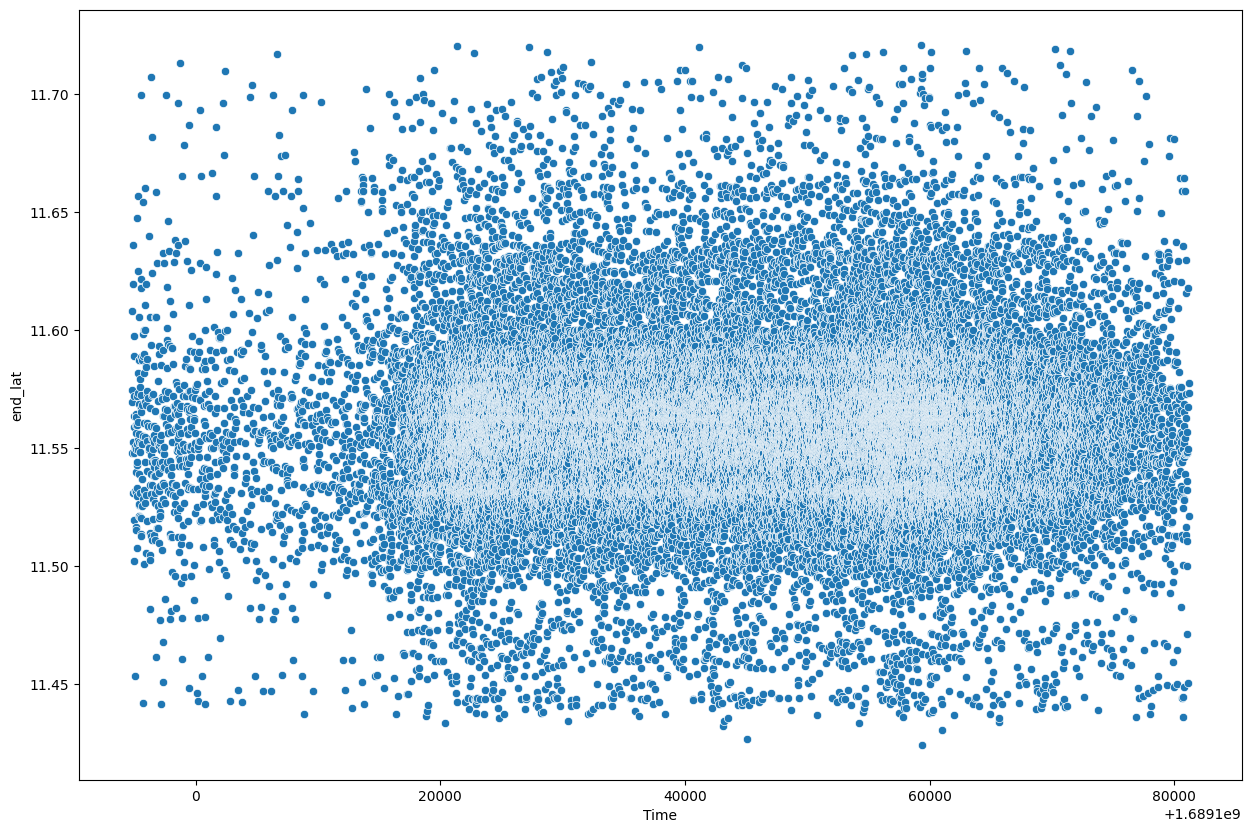

<Figure size 640x480 with 0 Axes>

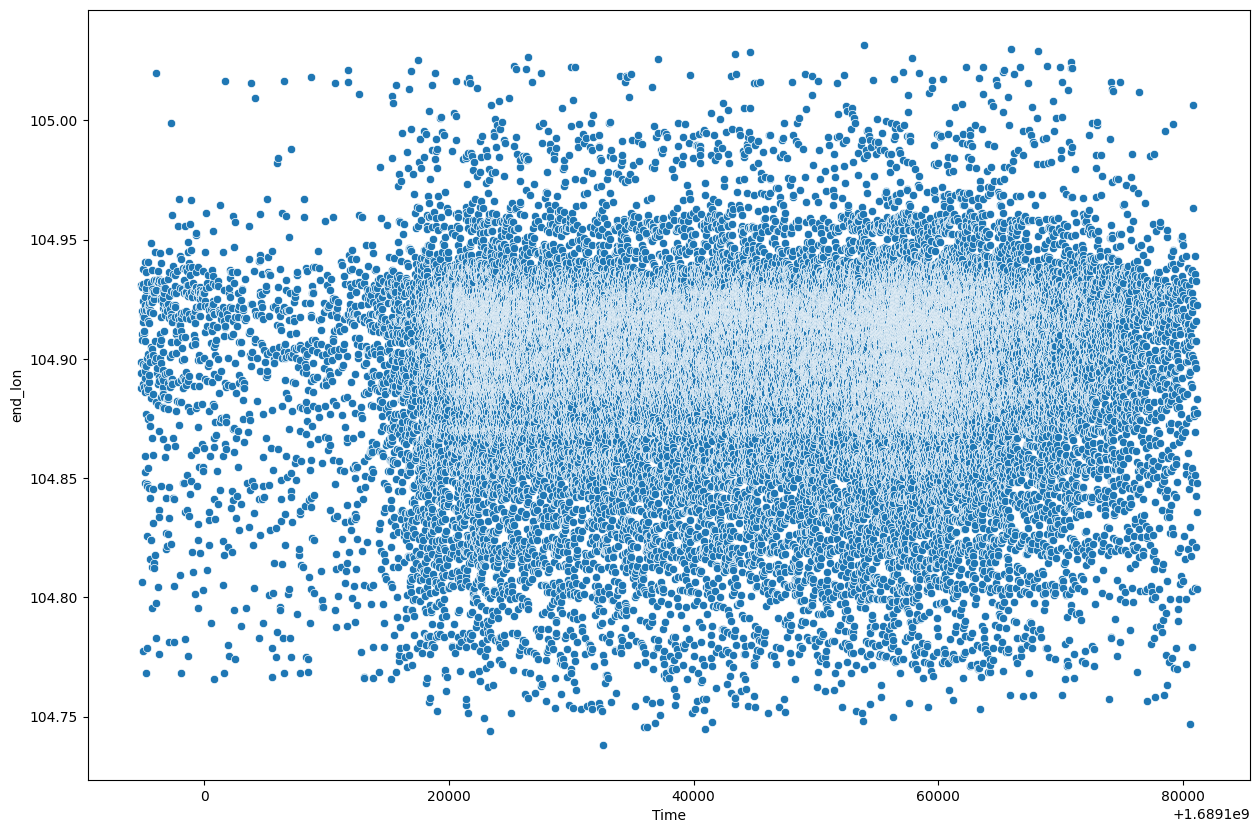

<Figure size 640x480 with 0 Axes>

In [4]:
# 2D SCATTERPLOT
fields = ['start_lat', 'start_lon', 'end_lat', 'end_lon']

for field in fields: 
    plt.figure(figsize=(15, 10))
    myplot = sns.scatterplot(x='time', y=field, data=df_od)
    myplot.set_xlabel('Time')
    myplot.set_ylabel(field)
    plt.show()
    plt.clf()

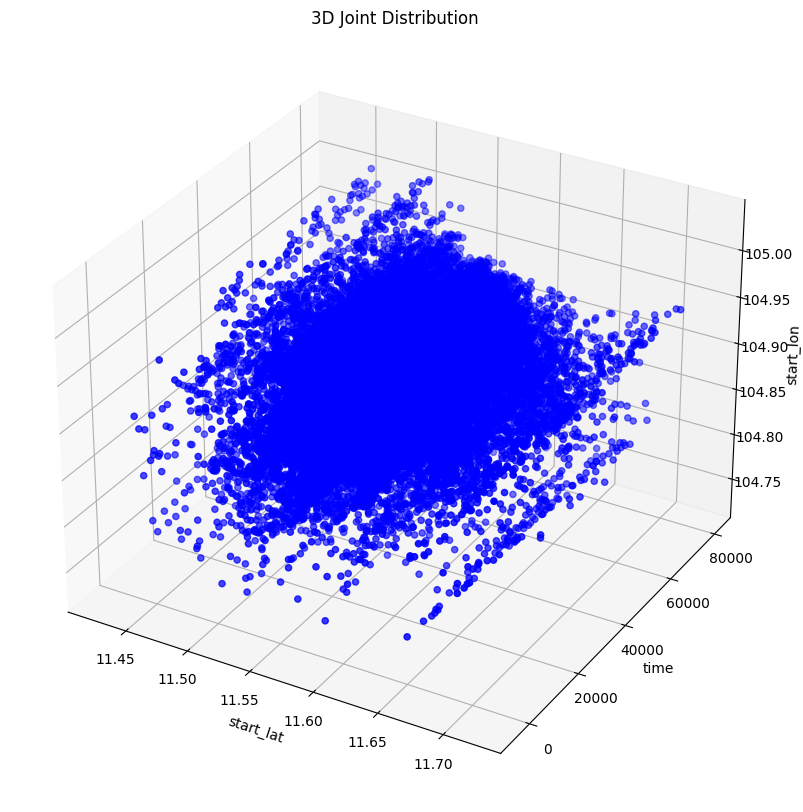

<Figure size 640x480 with 0 Axes>

In [9]:
# 3D SCATTERPLOT
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot 3D scatter plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_od['start_lat'], df_od['time'], df_od['start_lon'], c='blue', marker='o')
# Set labels and title
ax.set_xlabel('start_lat')
ax.set_ylabel('time')
ax.set_zlabel('start_lon')
ax.set_title('3D Joint Distribution')
plt.show()
plt.clf()


### 3D Scatterplot

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display

# Plot 3D scatter plot
def plot_3d_scatterplot(elevation, azimuth, marker_size):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df_od['time'], df_od['start_lat'], df_od['start_lon'], c='blue', marker='o', s=marker_size)
    # Set labels and title
    ax.set_xlabel('time')
    ax.set_ylabel('start_lat')
    ax.set_zlabel('start_lon')
    ax.set_title('3D Joint Distribution')
    ax.view_init(elev=elevation, azim=azimuth)
    plt.show()

elevation_slider = widgets.IntSlider(min=0, max=360, step=1, value=30, description='Elevation:')
azimuth_slider = widgets.IntSlider(min=0, max=360, step=1, value=30, description='Azimuth:')
marker_size_slider = widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1, description='Marker Size:')
widgets.interact(plot_3d_scatterplot, elevation=elevation_slider, azimuth=azimuth_slider, marker_size=marker_size_slider)

interactive(children=(IntSlider(value=30, description='Elevation:', max=360), IntSlider(value=30, description=…

<function __main__.plot_3d_scatterplot(elevation, azimuth, marker_size)>

In [12]:
# Plot 3D scatter plot
def plot_3d_scatterplot(elevation, azimuth, marker_size):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df_od['time'], df_od['end_lat'], df_od['end_lon'], c='blue', marker='o', s=marker_size)
    # Set labels and title
    ax.set_xlabel('time')
    ax.set_ylabel('end_lat')
    ax.set_zlabel('end_lon')
    ax.set_title('3D Joint Distribution')
    ax.view_init(elev=elevation, azim=azimuth)
    plt.show()

elevation_slider = widgets.IntSlider(min=0, max=360, step=1, value=30, description='Elevation:')
azimuth_slider = widgets.IntSlider(min=0, max=360, step=1, value=30, description='Azimuth:')
marker_size_slider = widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1, description='Marker Size:')
widgets.interact(plot_3d_scatterplot, elevation=elevation_slider, azimuth=azimuth_slider, marker_size=marker_size_slider)

interactive(children=(IntSlider(value=30, description='Elevation:', max=360), IntSlider(value=30, description=…

<function __main__.plot_3d_scatterplot(elevation, azimuth, marker_size)>

### 3D Scatterplot with Filter

In [16]:
# 3D PLOT, STARTING COORDINATES
def plot_3d_scatterplot(time_min, time_max, elevation, azimuth, marker_size):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Filter data based on time range
    filtered_data = df_od[(df_od['time'] >= time_min) & (df_od['time'] <= time_max)]
    
    ax.scatter(filtered_data['time'], filtered_data['start_lat'], filtered_data['start_lon'], c='blue', marker='o', s=marker_size)
    # Set labels and title
    ax.set_xlabel('time')
    ax.set_ylabel('start_lat')
    ax.set_zlabel('start_lon')
    ax.set_title('Time & start_lat & start_lon')
    ax.view_init(elev=elevation, azim=azimuth)
    plt.show()

# Define the range of time values
time_min = df_od['time'].min()
time_max = df_od['time'].max()

# Create interactive sliders
time_min_slider = widgets.FloatSlider(min=time_min, max=time_max, step=0.1, value=time_min, description='Min Time:')
time_max_slider = widgets.FloatSlider(min=time_min, max=time_max, step=0.1, value=time_max, description='Max Time:')
elevation_slider = widgets.IntSlider(min=0, max=360, step=1, value=30, description='Elevation:')
azimuth_slider = widgets.IntSlider(min=0, max=360, step=1, value=30, description='Azimuth:')
marker_size_slider = widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1, description='Marker Size:')
widgets.interact(plot_3d_scatterplot, time_min=time_min_slider, time_max=time_max_slider, elevation=elevation_slider, azimuth=azimuth_slider, marker_size=marker_size_slider)


interactive(children=(FloatSlider(value=1689094803.0, description='Min Time:', max=1689181194.0, min=168909480…

<function __main__.plot_3d_scatterplot(time_min, time_max, elevation, azimuth, marker_size)>

In [15]:
# 3D PLOT, ENDING COORDINATES
def plot_3d_scatterplot(time_min, time_max, elevation, azimuth, marker_size):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Filter data based on time range
    filtered_data = df_od[(df_od['time'] >= time_min) & (df_od['time'] <= time_max)]
    
    ax.scatter(filtered_data['time'], filtered_data['end_lat'], filtered_data['end_lon'], c='blue', marker='o', s=marker_size)
    # Set labels and title
    ax.set_xlabel('time')
    ax.set_ylabel('end_lat')
    ax.set_zlabel('end_lon')
    ax.set_title('Time & end_lat & end_lon')
    ax.view_init(elev=elevation, azim=azimuth)
    plt.show()

# Define the range of time values
time_min = df_od['time'].min()
time_max = df_od['time'].max()

# Create interactive sliders
time_min_slider = widgets.FloatSlider(min=time_min, max=time_max, step=0.1, value=time_min, description='Min Time:')
time_max_slider = widgets.FloatSlider(min=time_min, max=time_max, step=0.1, value=time_max, description='Max Time:')
elevation_slider = widgets.IntSlider(min=0, max=360, step=1, value=30, description='Elevation:')
azimuth_slider = widgets.IntSlider(min=0, max=360, step=1, value=30, description='Azimuth:')
marker_size_slider = widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1, description='Marker Size:')
widgets.interact(plot_3d_scatterplot, time_min=time_min_slider, time_max=time_max_slider, elevation=elevation_slider, azimuth=azimuth_slider, marker_size=marker_size_slider)


interactive(children=(FloatSlider(value=1689094803.0, description='Min Time:', max=1689181194.0, min=168909480…

<function __main__.plot_3d_scatterplot(time_min, time_max, elevation, azimuth, marker_size)>